In [1]:
# from hyperopt import Trials, STATUS_OK, tpe
# from hyperas import optim
# from hyperas.distributions import choice, uniform
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os.path

In [2]:
# model.add(Dense(50, activation='linear'))

# # model.add(Dense(50, activation='relu'))
# model.add(Dense(1)) # last layer with 1 neuron
# model.compile(optimizer='rmsprop', loss='mse') # for regression models



# def model(X_train, Y_train, X_val, Y_val):
    
#     model = Sequential()
#     model.add(Dense({{choice([128, 256, 512, 1024])}}, activation={{choice(['relu', 'sigmoid'])}}))
# #     model.add(Activation({{choice(['relu', 'sigmoid'])}}))
#     model.add(Dropout({{uniform(0, 1)}}))
# #     model.add(Dense({{choice([128, 256, 512, 1024])}}))
# #     model.add(Activation({{choice(['relu', 'sigmoid'])}}))
# #     model.add(Dropout({{uniform(0, 1)}}))
    
#     if conditional({{choice(['two', 'three'])}}) == 'three':
#         model.add(Dense({{choice([128, 256, 512, 1024])}}))
#         model.add(Activation({{choice(['relu', 'sigmoid'])}}))
#         model.add(Dropout({{uniform(0, 1)}}))
        
#     model.add(Dense(10))
#     model.add(Activation('softmax'))
#     adam = keras.optimizers.Adam(lr={{choice([10**-3, 10**-2, 10**-1])}})
#     rmsprop = keras.optimizers.RMSprop(lr={{choice([10**-3, 10**-2, 10**-1])}})
#     sgd = keras.optimizers.SGD(lr={{choice([10**-3, 10**-2, 10**-1])}})
   
#     choiceval = {{choice(['adam', 'sgd', 'rmsprop'])}}
#     if choiceval == 'adam':
#         optim = adam
#     elif choiceval == 'rmsprop':
#         optim = rmsprop
#     else:
#         optim = sgd
        
#     model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
#     model.fit(X_train, Y_train,
#               batch_size={{choice([128,256,512])}},
#               nb_epoch=20,
#               verbose=2,
#               validation_data=(X_val, Y_val))
#     score, acc = model.evaluate(X_val, Y_val, verbose=0)
#     print('Test accuracy:', acc)
#     return {'loss': -acc, 'status': STATUS_OK, 'model': model}

The shape of our features is: (160000, 7)
Index(['id', 't', 'x', 'y', 'z', 'velX', '100velX'], dtype='object')


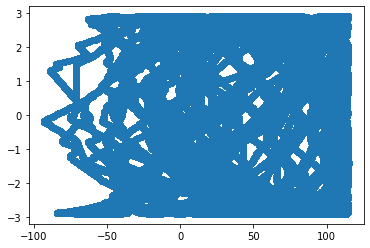

In [3]:
from pandas_profiling import ProfileReport

dir = 'C:/Users/Chandana Jaysundara/Documents/mill/test_code_new/254mm/25.4mm/0.3J/0.5N'
fin = os.path.join(dir,'particle_velocity.csv')

df = pd.read_csv(fin)
df_filter = df['t'] < 100
df = df[df_filter]
df = df.append(df)
df = df.append(df)
df = df.append(df)
df0 = df

plt.scatter(df['x'],df['100velX'])
# df = pd.read_excel('refined2.xlsx')
# df0 = pd.read_excel('refined2.xlsx')
print('The shape of our features is:', df.shape)
print(df.columns)
# df = df.iloc[:-3,:]
# print(len(df))""
# print(df.tail())
# sns.regplot(x=df['IE_per_mass'],y=df['tot_mass'], fit_reg=False)

# df_filter = df['k1'] < 2
# df = df[df_filter]

# print(df.head())
# df = df[df['k1']]

# ProfileReport(df)


In [4]:
# df.columns

In [5]:
from sklearn.model_selection import train_test_split
# y = df['wear_rate_percentage'].values
y = df['100velX'].values

df= df.drop('id', axis = 1)
df= df.drop('velX', axis = 1)
df= df.drop('100velX', axis = 1)
# df= df.drop('t', axis = 1)
# df= df.drop('x', axis = 1)
# df= df.drop('y', axis = 1)
# df= df.drop('z', axis = 1)


# Convert to numpy array
X = df.values


print(df.shape)
print(df.columns)

(160000, 4)
Index(['t', 'x', 'y', 'z'], dtype='object')


In [6]:
# sns.pairplot(df)


In [7]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)


(107200, 4)
(52800, 4)


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [9]:
#help(MinMaxScaler)

In [10]:
# model = Sequential([Dense(4, activation='relu'),
#                    Dense(4, activation='relu'),
#                    Dense(1)])

In [11]:
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Input, Dense
from keras.layers import GaussianNoise


model = Sequential()
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(50, activation='relu'))
# model.add(GaussianNoise(0.1))
# model.add(Dense(50,input_dim=X.shape[1],activation='relu'))


# model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear')) # last layer with 1 neuron
model.compile(optimizer='adam', loss='mse')
# model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy']) # for regression models
# model.compile(loss='binary_crossentropy',otimizer='adam',metric=['accuray'])


dict_keys(['loss', 'val_loss'])
         loss  val_loss
0    4.257555  4.243003
1    4.241164  4.228525
2    4.226148  4.215173
3    4.212337  4.203053
4    4.199839  4.192214
..        ...       ...
495  1.078469  1.073672
496  1.074284  1.071915
497  1.072519  1.071927
498  1.072629  1.071593
499  1.072073  1.068993

[500 rows x 2 columns]


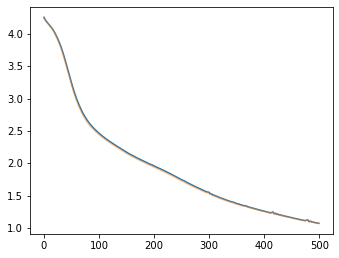

In [12]:
# epochs - number of iterations

# his = model.fit(X, y, validation_split=0.3, epochs=1000, batch_size=len(X),verbose=0, random_state=42)
his = model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), epochs=500, batch_size=len(X),verbose=0)
print(his.history.keys())


# fig = plt.figure(figsize=(6,4.5))
# ax = fig.add_axes([0.2,0.2,0.7,0.7])
# Summarize history for accuracy
# plt.plot(his.history['accuracy'])
# plt.plot(his.history['val_accuracy'])
# plt.legend(['train, test'], loc='best')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.show()

# Summarize history for loss
# plt.plot(his.history['loss'])
# plt.plot(his.history['val_loss'])
# plt.legend(['train, test'], loc='best')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.show()

# print(len(his.history.epoch))
# epoch = np.arange(0,10,1)
# print(model.history.history['loss'])
# print(his.history['loss'])
# ax.plot(model.history.epoch, his.history['loss'], label='train')
# ax.plot(model.history.epoch, his.history['val_loss'], label='test')

# ax.plot(epoch, his.history['accuracy'], label='train')
# ax.plot(epoch, his.history['val_accuracy'], label='test')

#         ,his.history['val_loss'])

# lg = plt.legend(loc='best')

# fout = "loss2.jpg"
# fig.savefig(fout, dpi=500)

# print(model.history.epoch)
# model.history.validation_data
# val_data = pd.DataFrame(model.history.validation_data);
# model.history.validation_data

loss_df = pd.DataFrame(model.history.history)
fig = plt.figure(figsize=(6,4.5))
ax = fig.add_axes([0.2,0.2,0.7,0.7])
# loss_df.plot()
print(loss_df)
# ax.set_ylim(0,0.4)
ax.plot(model.history.epoch, loss_df['loss'], label='Train')
ax.plot(model.history.epoch, loss_df['val_loss'], label='Test', alpha=0.5)
print(model.history)

In [13]:
# Mean squared error of test data (loss)
print("Test MSE ",model.evaluate(X_test, y_test, verbose=0))
# Mean squared error of training data (loss)
print("Train MSE",model.evaluate(X_train, y_train, verbose=0))

# from ann_visualizer.visualize import ann_viz;
# ann_viz(model, title="GOOD")

Test MSE  1.0689928531646729
Train MSE 1.0696300268173218


No handles with labels found to put in legend.


52800
Invalid % 0.9639962121212121


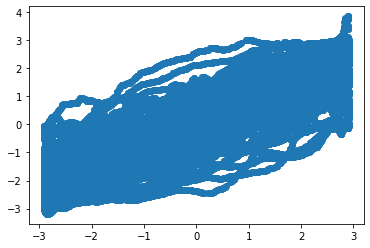

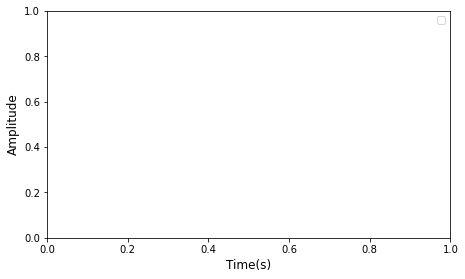

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# predictions based on test data
test_predictions = model.predict(X_test)
# Convert numpy array to Pandas series and reshape 
test_predictions = pd.Series(test_predictions.reshape(len(test_predictions),))
print(len(test_predictions))
t = X_test[:,0]
posx = X_test[:,1]
# Create a dataframe

pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions],axis=1)
# print(pred_df)

pred_df.columns = ['Test True Y', 'Model Predictions']
#sns.pairplot(pred_df)
plt.scatter(pred_df['Test True Y'],pred_df['Model Predictions'], )


fig = plt.figure(figsize=(8,4.5))
ax = fig.add_axes([0.2,0.2,0.7,0.7])
# ax.set_xlim(0,50)
ax.set_xlabel('Time(s)', size=12)
ax.set_ylabel('Amplitude', size=12)
# plt.scatter(posx,pred_df['Test True Y'], s=12, label='Real')
# plt.scatter(posx,pred_df['Model Predictions'], s=4, label='Prediction', color='orange')
lg = plt.legend(loc='best')

errors = abs(pred_df['Test True Y']-pred_df['Model Predictions'])
invalid = errors > 0.05

count = 0
for i in range(len(invalid)):
    if(invalid[i]):
        count += 1
print("Invalid %", count/len(invalid))

actual = np.array(pred_df['Test True Y'])
pred = np.array(pred_df['Model Predictions'])

# fout = os.path.join(dir, "pic/true_vs_prediction.jpg")
# fig.savefig(fout, dpi=600)


# invalid_rows = []
# for i in range(len(pred_df['Test True Y'])):
#     if(actual[i]/pred[i] > 0.1 and actual[i]/pred[i] > 2.2):
#         invalid_rows.append((df0['id'].iloc[i]))

# print(invalid_rows)
# # print(pred_df[invalid])
# print("Valid count",len(actual))
# print("Invalid count",len(invalid_rows))

# delete = df0.drop(df0.index[[2, 4, 5, 10, 13, 14, 15, 16, 22, 23, 26, 28, 30, 59, 62, 63, 65, 72, 75]])
# delete.to_excel('refined2.xlsx')

# print(test_predictions)

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
# RMS
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

1.033921314348373

In [16]:
# New data
#mill_dia	par_dia	tot_mass	N*	rpm	
# new_mill = [[1000,25.4,553.4,0.5,21.3]]

# # scale data
# new_mill= scaler.transform(new_mill)

# model.predict(new_mill)

In [17]:
# df0 = pd.read_excel('prediction_8_steps.xlsx', sheet_name='8-8')
# features= df0.drop('z', axis = 1)
# features= features.drop('z_raw', axis = 1)
# features= features.drop('h', axis = 1)
# features= features.drop('finnei', axis = 1)
# # features= features.drop('shear', axis = 1)

# features= features.drop('newh', axis = 1)
# features= features.drop('d', axis = 1)

# features= features.drop('E/A', axis = 1)
# features= features.drop('shear', axis = 1)
# features= features.drop('h/z', axis = 1)
# features= features.drop('normE', axis = 1)
# # features= features.drop('normh', axis = 1)
# # features= features.drop('atan', axis = 1)
# features= features.drop('modnewh', axis = 1)
# features= features.drop('k1', axis = 1)
# print(features.columns)
# print(features.shape)


# scaler = MinMaxScaler()
# scaler.fit(features)
# new_data = scaler.transform(features)

# # print(new_data)
# predictions = model.predict(new_data)
# df = pd.DataFrame(predictions, columns=['k1'])

# dt = 11575
# hard = 500.
# df0['k1'] = predictions
# df0['newh'] = np.array(df0['h']) - 41.*dt*np.array(df0['k1'])*np.array(df0['shear'])*1e-6*(50.0/100.)/hard

# df0.to_excel('k8-8.xlsx')


In [18]:
# If your model is complex and takes a lot of time to train, it is better to save as a hdfs file
#from tensorflow.python.keras.models import load_model

In [19]:
#model.save('my_gem_model.h5')

In [20]:
#later_model = load_model('my_gem_model.h5')

In [21]:
#later_model.predict(new_gem)